In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import folium

In [44]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


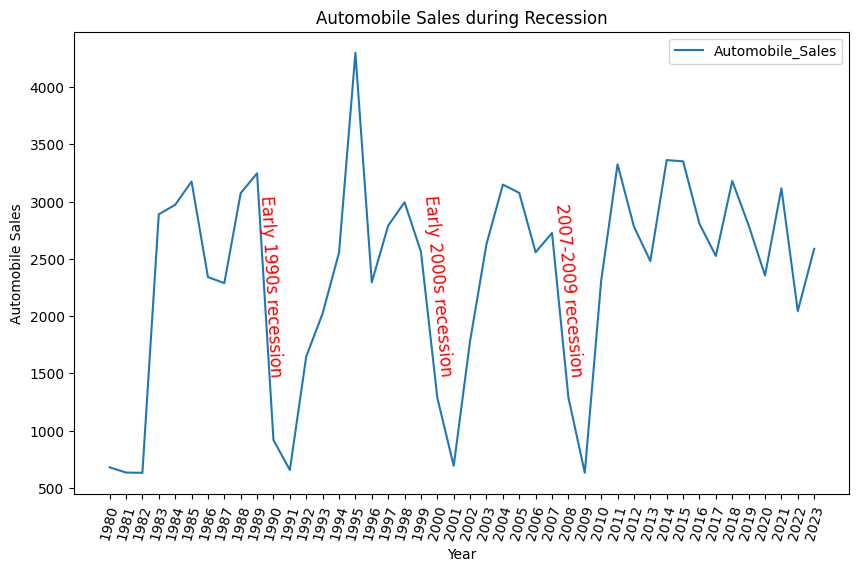

In [45]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
plt.figure(figsize=(10, 6))
df_line.plot(kind='line')
plt.title('Automobile Sales during Recession')
plt.ylabel('Automobile Sales')
plt.xlabel('Year')
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.text(1989, 1500, 'Early 1990s recession', fontsize=12, color='red', rotation=273)
plt.text(1999, 1500, 'Early 2000s recession', fontsize=12, color='red', rotation=275)
plt.text(2007, 1500, '2007-2009 recession', fontsize=12, color='red', rotation=275)
plt.legend()
plt.show()

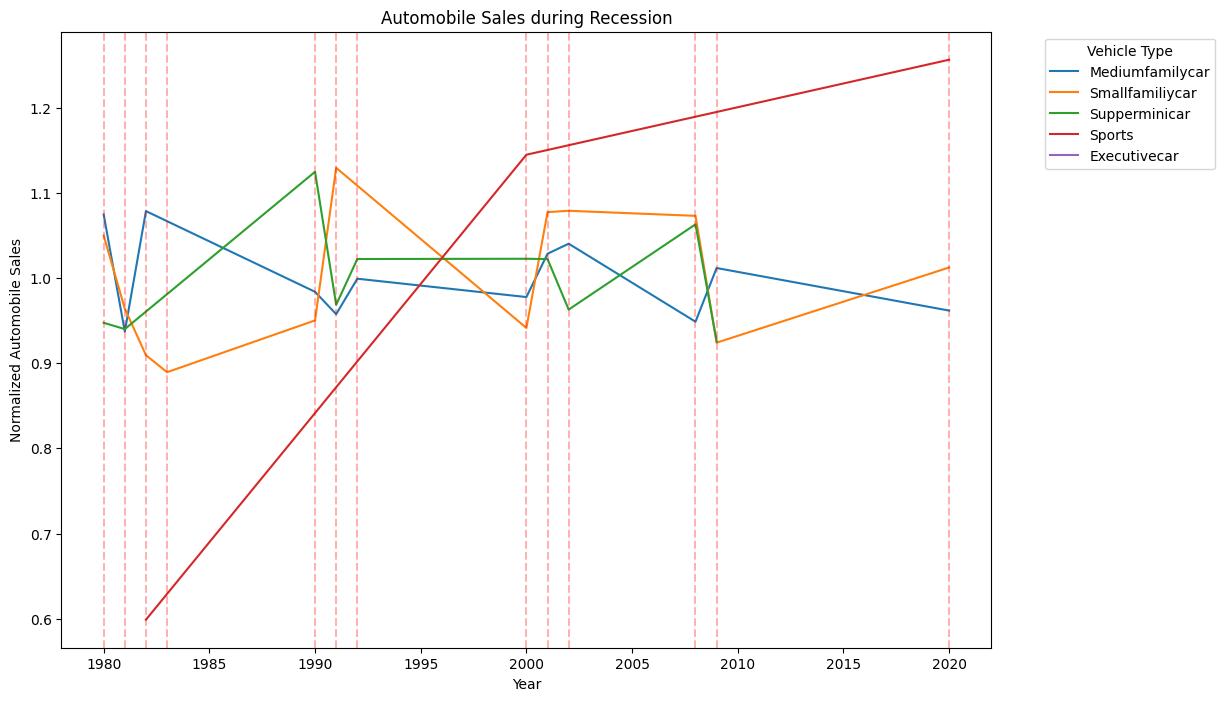

In [48]:
df_rec = df[df['Recession'] == 1]
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_Mline['Normalized_Automobile_Sales'] = df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())
df_Mline.set_index('Year', inplace=True)

plt.figure(figsize=(12, 8))
for vehicle in df_Mline['Vehicle_Type'].unique():
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle]
    plt.plot(data.index, data['Normalized_Automobile_Sales'], label=vehicle)

recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='r', linestyle='--', alpha=0.3)

plt.title('Automobile Sales during Recession')
plt.ylabel('Normalized Automobile Sales')
plt.xlabel('Year')
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

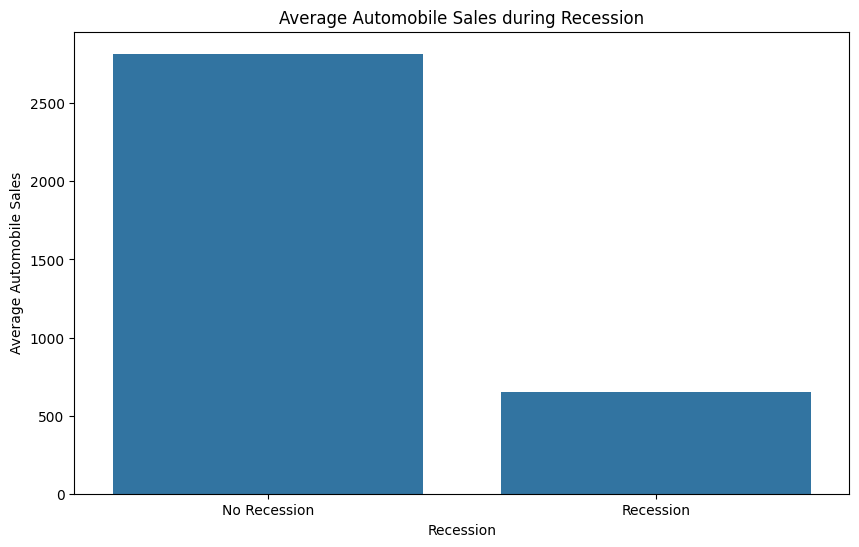

In [49]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', data=new_df)
plt.title('Average Automobile Sales during Recession')
plt.ylabel('Average Automobile Sales')
plt.xlabel('Recession')
plt.xticks(ticks=[0, 1], labels=['No Recession', 'Recession'])
plt.show()

,Recession,Vehicle_Type,Automobile_Sales
0,0,Executivecar,2686.436232
1,0,Mediumfamilycar,2981.501935
2,0,Smallfamiliycar,2752.658140
3,0,Sports,2910.636264
4,0,Supperminicar,2495.242222


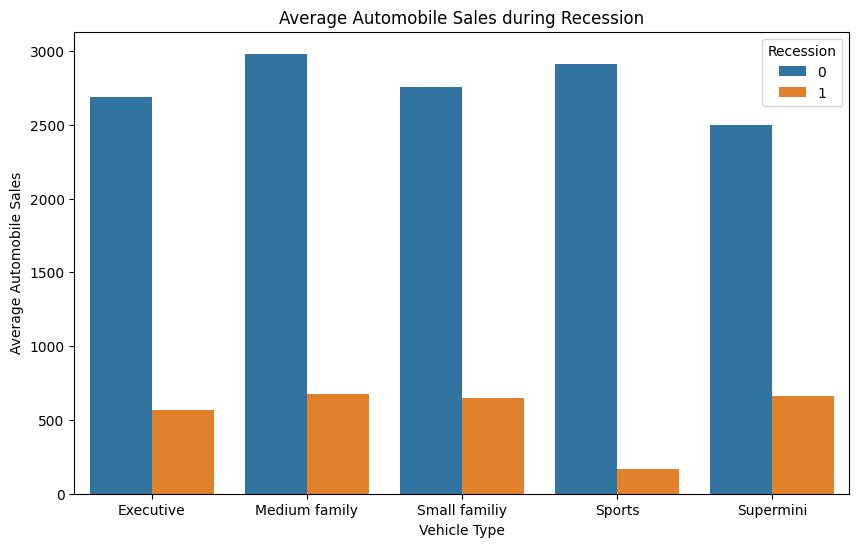

In [53]:
recession_data=df[df['Recession']==1]
dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Vehicle_Type',y='Automobile_Sales',data=dd,hue='Recession')
plt.title('Average Automobile Sales during Recession')
plt.ylabel('Average Automobile Sales')
plt.xlabel('Vehicle Type')
plt.xticks(ticks=[0,1,2,3,4],labels=['Executive','Medium family','Small familiy','Sports','Supermini'])
dd.head()

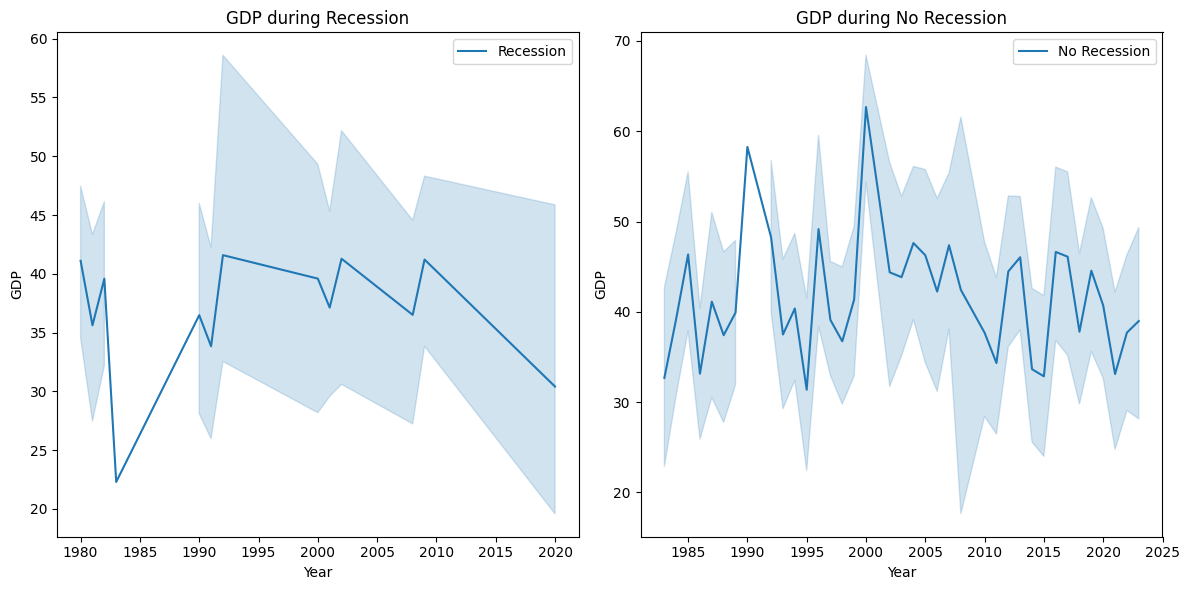

In [56]:
rec_data=df[df['Recession']==1]
non_rec_data=df[df['Recession']==0]
fig=plt.figure(figsize=(12,6))
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

sns.lineplot(x='Year',y='GDP',data=rec_data,label='Recession',ax=ax0)
ax0.set_title('GDP during Recession')
ax0.set_ylabel('GDP')
ax0.set_xlabel('Year')

sns.lineplot(x='Year',y='GDP',data=non_rec_data,label='No Recession',ax=ax1)
ax1.set_title('GDP during No Recession')
ax1.set_ylabel('GDP')
ax1.set_xlabel('Year')

plt.tight_layout()
plt.show()

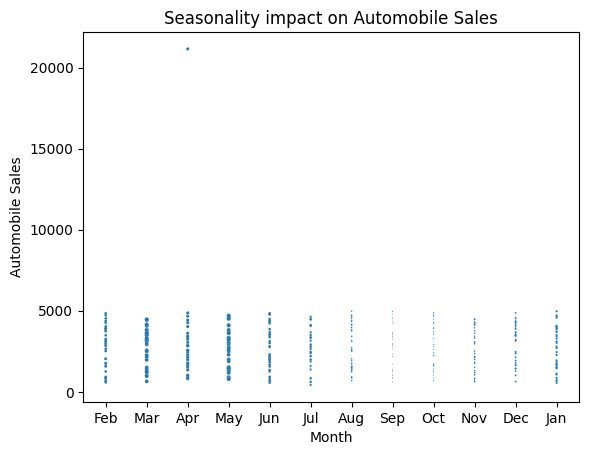

In [67]:
non_rec_data=df[df['Recession']==0]
size=non_rec_data['Seasonality_Weight']

sns.scatterplot(x='Month',y='Automobile_Sales',data=non_rec_data,s=size*5)
plt.title('Seasonality impact on Automobile Sales')
plt.ylabel('Automobile Sales')
plt.xlabel('Month')
plt.show()

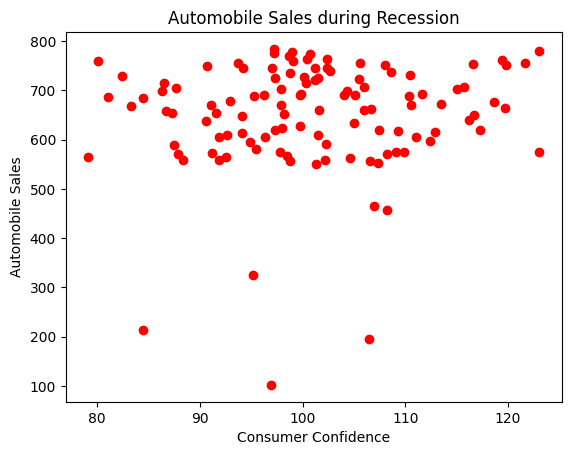

In [66]:
rec_data=df[df['Recession']==1]
plt.scatter(rec_data['Consumer_Confidence'],rec_data['Automobile_Sales'],color='r')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.ylabel('Automobile Sales')
plt.xlabel('Consumer Confidence')
plt.show()

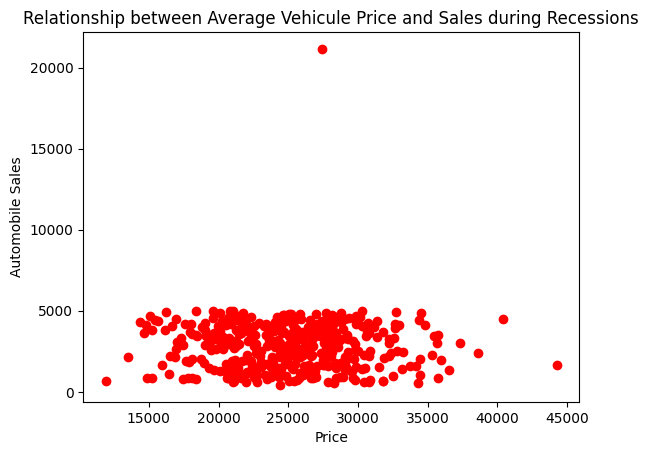

In [69]:
non_rec_data=df[df['Recession']==0]
plt.scatter(non_rec_data['Price'],non_rec_data['Automobile_Sales'],color='r')
plt.title('Relationship between Average Vehicule Price and Sales during Recessions')
plt.ylabel('Automobile Sales')
plt.xlabel('Price')
plt.show()

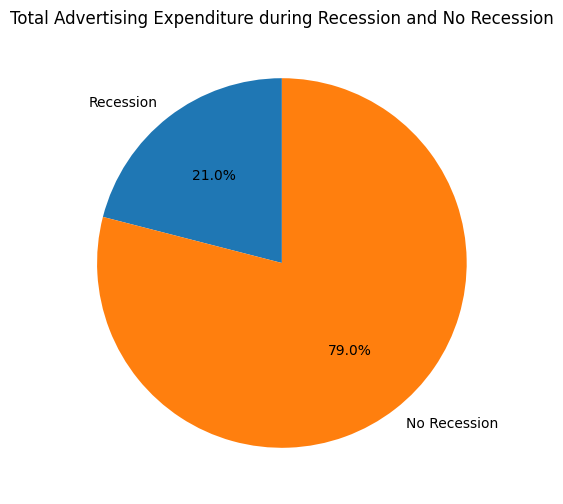

In [70]:
Rdata=df[df['Recession']==1]
NRdata=df[df['Recession']==0]

RAtotal=Rdata['Advertising_Expenditure'].sum()
NRAtotal=NRdata['Advertising_Expenditure'].sum()

fig=plt.figure(figsize=(8,6))

labels=['Recession','No Recession']
sizes=[RAtotal,NRAtotal]
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('Total Advertising Expenditure during Recession and No Recession')
plt.show()

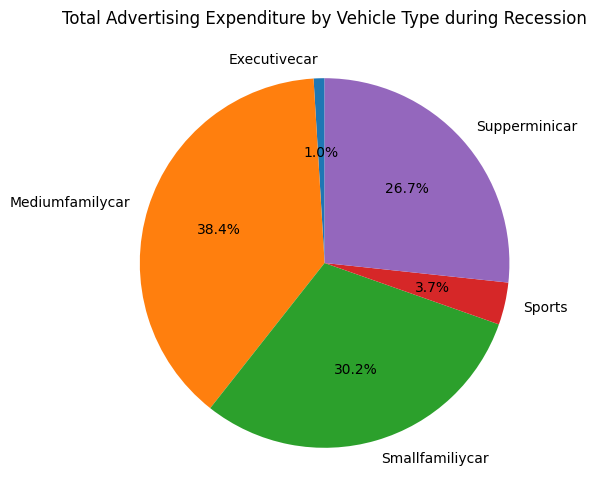

In [71]:
Rdata=df[df['Recession']==1]
VTexp=Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
plt.figure(figsize=(10,6))
labels=VTexp['Vehicle_Type']
sizes=VTexp['Advertising_Expenditure']
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('Total Advertising Expenditure by Vehicle Type during Recession')
plt.show()

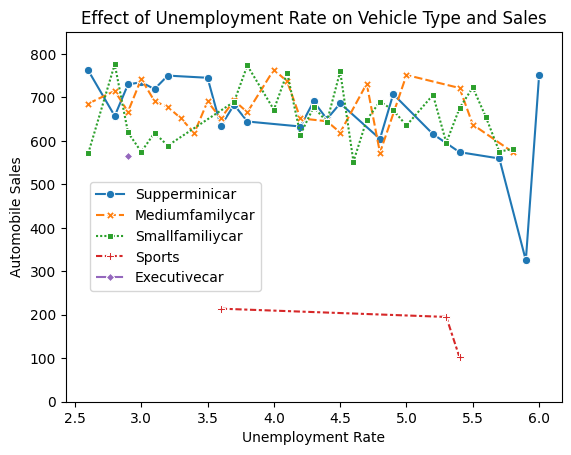

In [80]:
df_rec = df[df['Recession'] == 1]
sns.lineplot(x='unemployment_rate', y='Automobile_Sales', data=df_rec, hue='Vehicle_Type', style='Vehicle_Type', markers=True, err_style=None)
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.ylabel('Automobile Sales')
plt.xlabel('Unemployment Rate')
plt.ylim(0, 850)
plt.legend(loc=(0.05, .3))

In [83]:
pip install pyodide

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "c:\Users\julie\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 389, in <module>
          main()
        File "c:\Users\julie\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 373, in main
          json_out["return_val"] = hook(**hook_input["kwargs"])
        File "c:\Users\julie\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 143, in get_requires_for_build_wheel
          return hook(config_settings)
        File "C:\Users\julie\AppData\Local\Temp\pip-build-env-k83rj13b\overlay\Lib\site-packages\setuptools\build_meta.py", line 334, in get_requires_for_build_wheel
        